In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [2]:
#@title Task 01
# Dataset2 (Adult)
import pandas as pd
adultDataset = pd.read_csv('/content/adult.data',header = None)
adultDataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
labelEncoding = preprocessing.LabelEncoder()
for columns in adultDataset.columns:
  if adultDataset[columns].dtype == type(object):
    adultDataset[columns] = labelEncoding.fit_transform(adultDataset[columns])

In [4]:
#@title DT1 USING GINI (Without Pruning)

adultX = adultDataset.copy(deep = True)
adultY = adultDataset.pop(14)

X_train, X_test, y_train, y_test = train_test_split(adultX,adultY,test_size =0.2, random_state = 1222157)

#Training Model Using DT
decisionTree = DecisionTreeClassifier(criterion='gini')
ModelDT = decisionTree.fit(X_train,y_train)

#Testing Model
predictionDT = decisionTree.predict(X_test)
print(predictionDT)

#Model Training Accuracy
print("=================DT Training Accuracy=================\n")
trainingAccuracyDT = decisionTree.score(X_train,y_train)
print(f"Training Accuracy Data : {trainingAccuracyDT}")

#Model Training Accuracy
print("=================DT Testing Accuracy=================\n")
testingAccuracyDT = accuracy_score(y_test,predictionDT)
print(f"Testing Accuracy Data : {testingAccuracyDT}")

[1 1 0 ... 0 0 1]
=================DT Training Accuracy=================

Training Accuracy Data : 1.0
=================DT Testing Accuracy=================

Testing Accuracy Data : 1.0


In [6]:
#@title DT1 USING GINI (With Pruning)

X_train, X_test, y_train, y_test = train_test_split(adultX,adultY,test_size =0.2, random_state = 1222157)

#Training Model Using DT
decisionTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
ModelDT = decisionTree.fit(X_train,y_train)

#Testing Model
predictionDT = decisionTree.predict(X_test)
print(predictionDT)

#Model Training Accuracy
print("=================DT Training Accuracy=================\n")
trainingAccuracyDT = decisionTree.score(X_train,y_train)
print(f"Training Accuracy Data : {trainingAccuracyDT}")

#Model Training Accuracy
print("=================DT Testing Accuracy=================\n")
testingAccuracyDT = accuracy_score(y_test,predictionDT)
print(f"Testing Accuracy Data : {testingAccuracyDT}")

[1 0 0 ... 0 0 0]
=================DT Training Accuracy=================

Training Accuracy Data : 0.8269732800982801
=================DT Testing Accuracy=================

Testing Accuracy Data : 0.8232765238753262


In [7]:
#@title DT1 USING Entropy (Without Pruning)

#Training Model Using DT
decisionTree = DecisionTreeClassifier(criterion='entropy')
ModelDT = decisionTree.fit(X_train,y_train)

#Testing Model
predictionDT = decisionTree.predict(X_test)
print(predictionDT)

#Model Training Accuracy
print("=================DT Training Accuracy=================\n")
trainingAccuracyDT = decisionTree.score(X_train,y_train)
print(f"Training Accuracy Data : {trainingAccuracyDT}")

#Model Training Accuracy
print("=================DT Testing Accuracy=================\n")
testingAccuracyDT = accuracy_score(y_test,predictionDT)
print(f"Testing Accuracy Data : {testingAccuracyDT}")

[1 0 0 ... 0 0 1]
=================DT Training Accuracy=================

Training Accuracy Data : 0.9999616093366094
=================DT Testing Accuracy=================

Testing Accuracy Data : 0.8051589129433441


In [9]:
#@title DT1 USING Entropy (With Pruning)

#Training Model Using DT
decisionTree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
ModelDT = decisionTree.fit(X_train,y_train)

#Testing Model
predictionDT = decisionTree.predict(X_test)
print(predictionDT)

#Model Training Accuracy
print("=================DT Training Accuracy=================\n")
trainingAccuracyDT = decisionTree.score(X_train,y_train)
print(f"Training Accuracy Data : {trainingAccuracyDT}")

#Model Training Accuracy
print("=================DT Testing Accuracy=================\n")
testingAccuracyDT = accuracy_score(y_test,predictionDT)
print(f"Testing Accuracy Data : {testingAccuracyDT}")

[1 0 0 ... 0 0 0]
=================DT Training Accuracy=================

Training Accuracy Data : 0.8409858722358723
=================DT Testing Accuracy=================

Testing Accuracy Data : 0.8350990327038231


In [10]:
#@title Dataset2 (WINE)
#Dataset 2
wineDataset = pd.read_csv('/content/wine.data')
wineDataset

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
#@title DT2 USING GINI (Without Pruning)

X = wineDataset.drop(columns=['1'])
y = wineDataset['1']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 12345)

#Training Model Using DT
decisionTree = DecisionTreeClassifier(criterion='gini')
ModelDT = decisionTree.fit(X_train,y_train)

#Testing Model
predictionDT = decisionTree.predict(X_test)
print(predictionDT)

#Model Training Accuracy
print("=================DT Training Accuracy=================\n")
dtTrace = decisionTree.score(X_train,y_train)
trainingAccuracyDT = dtTrace*100
print(f"Training Accuracy Data : {trainingAccuracyDT}")

#Model Training Accuracy
print("=================DT Testing Accuracy=================\n")
testingAccuracyDT = accuracy_score(y_test,predictionDT)
print(f"Testing Accuracy Data : {testingAccuracyDT}")

[2 2 3 1 2 1 3 2 3 2 2 2 2 1 2 1 2 2 2 3 3 2 3 3 2 1 3 2 3 1 1 1 3 1 1 1]
=================DT Training Accuracy=================

Training Accuracy Data : 100.0
=================DT Testing Accuracy=================

Testing Accuracy Data : 0.8611111111111112


In [12]:
#@title DT2 USING GINI (With Pruning)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 12345)

#Training Model Using DT
decisionTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
ModelDT = decisionTree.fit(X_train,y_train)

#Testing Model
predictionDT = decisionTree.predict(X_test)
print(predictionDT)

#Model Training Accuracy
print("=================DT Training Accuracy=================\n")
dtTrace = decisionTree.score(X_train,y_train)
trainingAccuracyDT = dtTrace*100
print(f"Training Accuracy Data : {trainingAccuracyDT}")

#Model Training Accuracy
print("=================DT Testing Accuracy=================\n")
testingAccuracyDT = accuracy_score(y_test,predictionDT)
print(f"Testing Accuracy Data : {testingAccuracyDT}")

[2 2 3 1 2 1 2 2 3 2 2 2 2 1 2 1 2 2 2 2 3 2 3 3 2 1 3 2 3 1 1 1 3 1 1 1]
=================DT Training Accuracy=================

Training Accuracy Data : 98.58156028368793
=================DT Testing Accuracy=================

Testing Accuracy Data : 0.9166666666666666


In [13]:
#@title DT2 USING Entropy (Without Pruning)

#Training Model Using DT
decisionTree = DecisionTreeClassifier(criterion='entropy')
ModelDT = decisionTree.fit(X_train,y_train)

#Testing Model
predictionDT = decisionTree.predict(X_test)
print(predictionDT)

#Model Training Accuracy
print("=================DT Training Accuracy=================\n")
trainingAccuracyDT = decisionTree.score(X_train,y_train)
print(f"Training Accuracy Data : {trainingAccuracyDT}")

#Model Training Accuracy
print("=================DT Testing Accuracy=================\n")
testingAccuracyDT = accuracy_score(y_test,predictionDT)
print(f"Testing Accuracy Data : {testingAccuracyDT}")

[2 2 3 1 3 1 2 2 3 3 2 2 2 1 2 1 2 2 2 2 3 2 3 3 2 1 3 2 3 1 1 1 3 1 1 1]
=================DT Training Accuracy=================

Training Accuracy Data : 1.0
=================DT Testing Accuracy=================

Testing Accuracy Data : 0.9722222222222222


In [17]:
#@title DT2 USING Entropy (With Pruning)

#Training Model Using DT
decisionTree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
ModelDT = decisionTree.fit(X_train,y_train)

#Testing Model
predictionDT = decisionTree.predict(X_test)
results = pd.DataFrame({'Actual Output': y_test, 'Predictions': predictionDT})

#Model Training Accuracy
print("=================DT Training Accuracy=================\n")
trainingAccuracyDT = decisionTree.score(X_train,y_train)
print(f"Training Accuracy Data : {trainingAccuracyDT}")

#Model Training Accuracy
print("=================DT Testing Accuracy=================\n")
testingAccuracyDT = accuracy_score(y_test,predictionDT)
print(f"Testing Accuracy Data : {testingAccuracyDT}")

=================DT Training Accuracy=================

Training Accuracy Data : 1.0
=================DT Testing Accuracy=================

Testing Accuracy Data : 0.9722222222222222


In [18]:
print(results)  #Actual vs Predicted

# Calculate correct and incorrect predictions
correctPredictions = sum(results['Actual Output'] == results['Predictions'])
totalPredictions = len(results)
wrongPredictions = totalPredictions - correctPredictions

# Display result
print(f"Correctly Predicted: {correctPredictions} out of {totalPredictions}")
print(f"Wrong Predictions: {wrongPredictions}")

     Actual Output  Predictions
109              2            2
68               2            2
175              3            3
55               1            1
148              3            3
17               1            1
70               2            2
93               2            2
152              3            3
150              3            3
67               2            2
112              2            2
78               2            2
35               1            1
42               1            2
16               1            1
89               2            2
122              2            2
100              2            2
61               2            2
163              3            3
116              2            2
159              3            3
160              3            3
125              2            2
10               1            1
151              3            3
120              2            2
158              3            3
40               1            1
33      

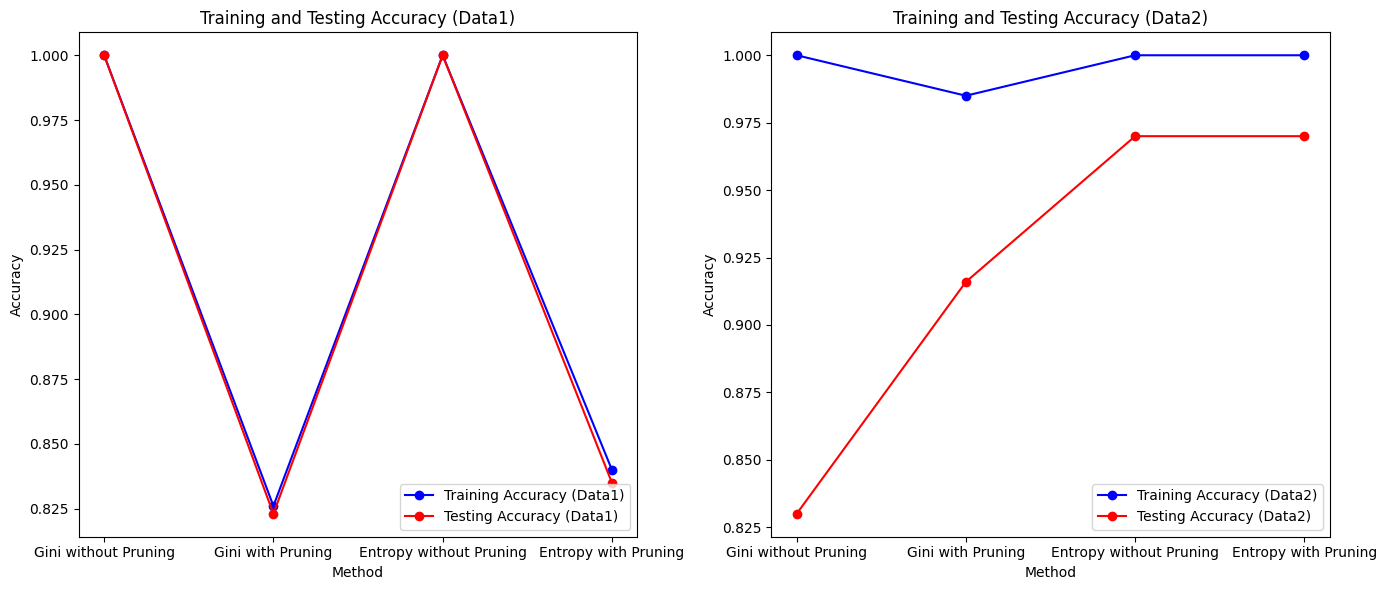

In [19]:
#Plotting

training_accuracy_data1 = [1.0, 0.826, 1.0, 0.84]
testing_accuracy_data1 = [1.0, 0.823, 1.0, 0.835]


training_accuracy_data2 = [1.0, 0.985, 1.0, 1.0]
testing_accuracy_data2 = [0.83, 0.916, 0.97, 0.97]

methods = ['Gini without Pruning', 'Gini with Pruning', 'Entropy without Pruning', 'Entropy with Pruning']

# Plotting for Dataset1
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(methods, training_accuracy_data1, marker='o', label='Training Accuracy (Data1)', color='blue')
plt.plot(methods, testing_accuracy_data1, marker='o', label='Testing Accuracy (Data1)', color='red')
plt.title('Training and Testing Accuracy (Data1)')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.legend()

# Plotting for Dataset2
plt.subplot(1, 2, 2)
plt.plot(methods, training_accuracy_data2, marker='o', label='Training Accuracy (Data2)', color='blue')
plt.plot(methods, testing_accuracy_data2, marker='o', label='Testing Accuracy (Data2)', color='red')
plt.title('Training and Testing Accuracy (Data2)')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()